### FACE DETECTION

In [2]:
import cv2 as cv
import io
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
u="https://101clipart.com/wp-content/uploads/16/Group%20Of%20People%20Image%2002.jpg"
u2="https://i.ytimg.com/vi/EGL_od_B4X8/maxresdefault.jpg"
raw_data=requests.get(u,stream=True).content
raw_data2=requests.get(u2,stream=True).content

arr=io.BytesIO(raw_data)
arr2=io.BytesIO(raw_data2)

In [28]:
Image.open(arr).convert("RGB").save("test.jpg")
Image.open(arr2).convert("RGB").save("test2.jpg")

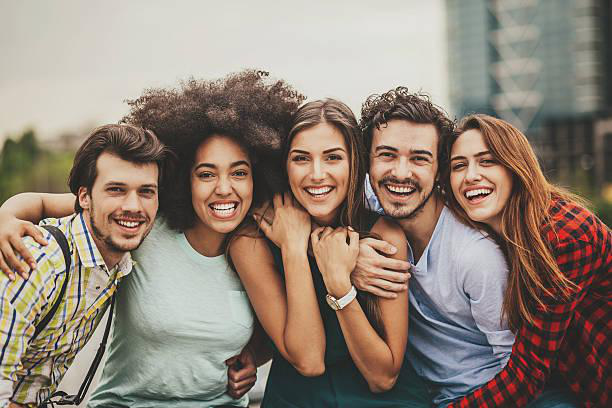

In [29]:
Image.open('test.jpg')

In [30]:
img=Image.open('test.jpg')
img2=Image.open('test2.jpg')

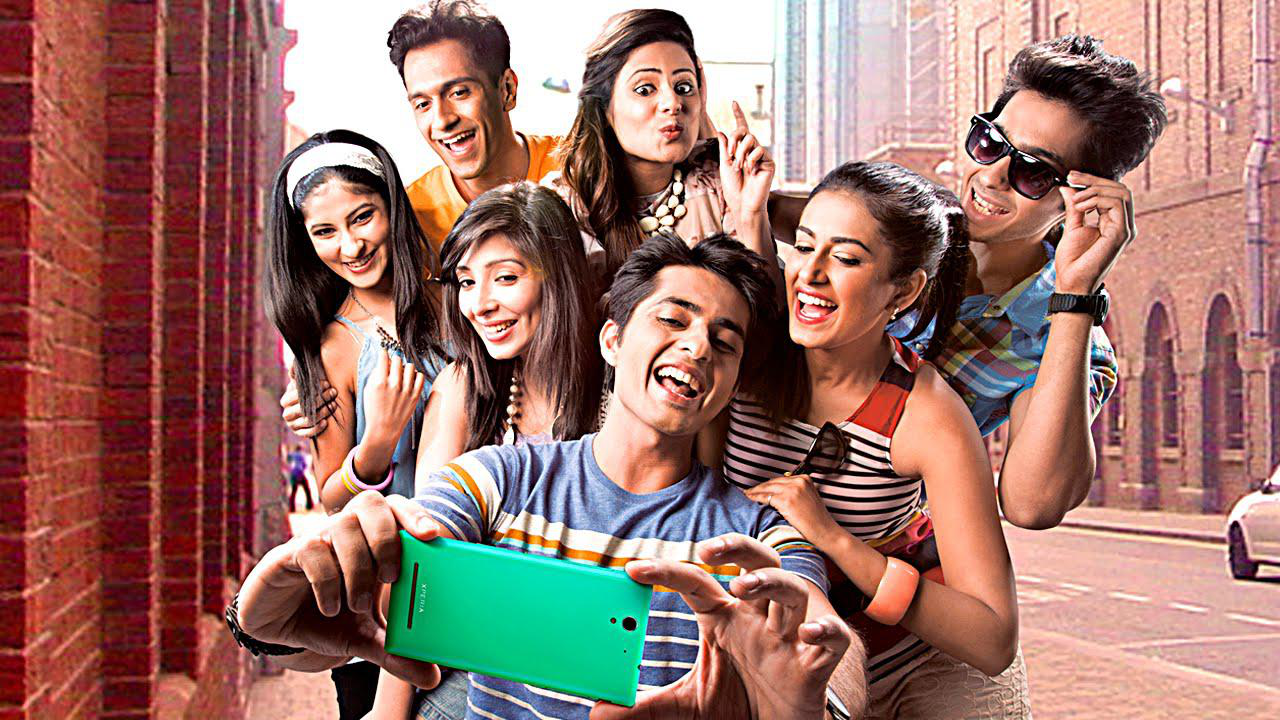

In [31]:
Image.open("test2.jpg")

In [32]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [33]:
np.array(img)

array([[[194, 190, 179],
        [194, 190, 179],
        [194, 190, 179],
        ...,
        [ 44,  44,  42],
        [ 48,  48,  46],
        [ 51,  51,  49]],

       [[194, 190, 179],
        [194, 190, 179],
        [194, 190, 179],
        ...,
        [ 44,  44,  42],
        [ 48,  48,  46],
        [ 51,  51,  49]],

       [[194, 190, 179],
        [194, 190, 179],
        [194, 190, 179],
        ...,
        [ 44,  44,  42],
        [ 48,  48,  46],
        [ 51,  51,  49]],

       ...,

       [[204, 216, 202],
        [203, 216, 206],
        [201, 213, 209],
        ...,
        [ 46,  36,  35],
        [ 46,  36,  35],
        [ 46,  36,  35]],

       [[195, 204, 183],
        [182, 191, 174],
        [157, 165, 154],
        ...,
        [ 46,  36,  35],
        [ 46,  36,  35],
        [ 46,  36,  35]],

       [[182, 183, 152],
        [140, 140, 114],
        [ 99, 100,  82],
        ...,
        [ 46,  36,  35],
        [ 46,  36,  35],
        [ 46,  36,  35]]

In [34]:
o_image=np.array(img)
o_image2=np.array(img2)

In [35]:
o_image.shape

(408, 612, 3)

In [36]:
cv.CascadeClassifier("haar_frontal.xml")

<CascadeClassifier 0000025A3A36D510>

In [37]:
detector=cv.CascadeClassifier("haar_frontal.xml")

In [38]:
gray_img=cv.cvtColor(o_image,cv.COLOR_RGB2GRAY)
gray_img2=cv.cvtColor(o_image2,cv.COLOR_RGB2GRAY)

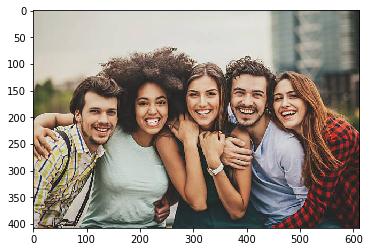

In [39]:
plt.imshow(img)

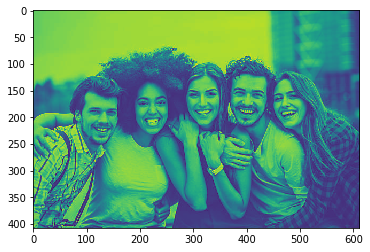

In [40]:
plt.imshow(gray_img)

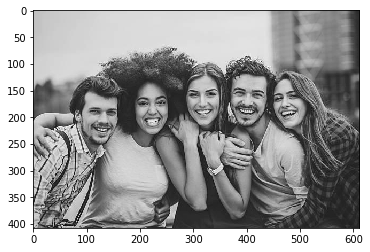

In [41]:
plt.imshow(gray_img,cmap='gray')

In [42]:
detector.detectMultiScale(gray_img,1.3,5)

array([[279, 128,  80,  80],
       [358, 122,  90,  90],
       [435, 135,  75,  75],
       [183, 143,  81,  81],
       [ 88, 161,  82,  82]], dtype=int32)

In [43]:
detector.detectMultiScale(gray_img2,1.11,5)

array([[ 291,  185,  101,  101],
       [ 624,  263,  154,  154],
       [ 605,   40,  122,  122],
       [ 758,  196,  147,  147],
       [ 379,   48,  121,  121],
       [1158,  330,   57,   57],
       [ 439,  239,  106,  106]], dtype=int32)

In [44]:
faces=detector.detectMultiScale(gray_img,1.3,5)
faces2=detector.detectMultiScale(gray_img2,1.11,5)

In [45]:
faces[0]

array([279, 128,  80,  80], dtype=int32)

In [46]:
faces[0][0]

279

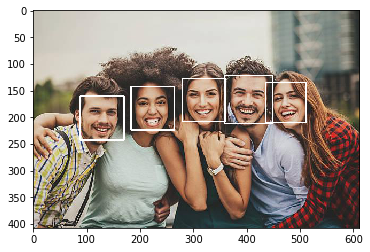

In [47]:
copy=o_image.copy()
for i in faces:
    x,y,w,h=i
    cv.rectangle(copy,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(copy)

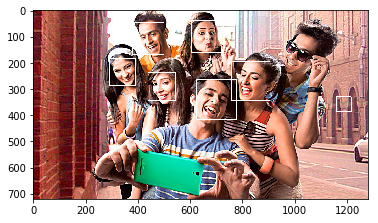

In [48]:
copy2=o_image2.copy()
for f in faces2:
    x,y,w,h=f
    cv.rectangle(copy2,(x,y),(x+w,y+h),(255,255,255),2)
plt.imshow(copy2)

In [51]:
#opening camera
cam=cv.VideoCapture(0)
while True:
    status,frame=cam.read()
    cv.imshow("face",frame)
    key = cv.waitKey(1) & 0xff
    
    if key == ord('q'):
        cv.destroyAllWindows()
        break
    
cam.release()

In [3]:
#face detection using camera
cam=cv.VideoCapture(0)
while True:
    status,frame=cam.read()
    o_image=np.array(frame)
    detector=cv.CascadeClassifier("haar_frontal.xml")
    gray_img=cv.cvtColor(o_image,cv.COLOR_RGB2GRAY)

    faces=detector.detectMultiScale(gray_img,1.3,5)
    copy=o_image.copy()
    
    for i in faces:
        x,y,w,h=i
        cv.rectangle(copy,(x,y),(x+w,y+h),(255,255,255),2)
 
    cv.imshow("face",copy)
    key = cv.waitKey(1) & 0xff
    
    if key == ord('q'):
        cv.destroyAllWindows()
        break
    
cam.release()